In [2]:
import numpy as np
from matplotlib import pyplot as plt


In [3]:
def sigmoid(X):  #sigmoid函数
    return 1/(1+np.exp(-X))

def loss(lost): #定义损失函数
    return lost*lost/2/lost.shape[0]

def normalize(inp,ma,mi): #定义归一化,使用训练数据为标准
    inp=(inp-mi)/(ma-mi)#-0.5
    return inp

class MLP(): #定义多层感知机
    def __init__(self): #初始化网络层，此处为3层。输入、输出、隐藏各一层
        self.first = np.random.rand(2,10)#输入层
        self.second = np.random.rand(10,8)#隐藏层
        self.final = np.random.rand(8,3)#输出层
        self.myloss_train=[]
        self.myloss_test=[]
    def forward(self,times,x_train,label_train,x_test,label_test,accpet,alpha):#进行前向传播以及反向修正，修改权重时注意，使用的是前向传播时的权重
        #训练数据初始化
        ma=x_train.max()
        mi=x_train.min()
        self.myloss_train=[]
        x_train=normalize(x_train,ma,mi)
        nowloss_train=accept+10
        #测试数据初始化
        self.myloss_test=[]
        x_test=normalize(x_test,ma,mi)
        nowloss_test=0
        #
        i=0
        while i<=times and nowloss_train>accept: 
            #训练数据传播过程
            x1_train=x_train@self.first
            y1_train=sigmoid(x1_train)
            x2_train=y1_train@self.second
            y2_train=sigmoid(x2_train)
            x3_train=y2_train@self.final
            y3_train=sigmoid(x3_train)
            errors_train=label_train-y3_train
            nowloss_train=loss(errors_train).sum()
            self.myloss_train.append(nowloss_train)
            
            #测试数据传播过程
            x1_test=x_test@self.first
            y1_test=sigmoid(x1_test)
            x2_test=y1_test@self.second
            y2_test=sigmoid(x2_test)
            x3_test=y2_test@self.final
            y3_test=sigmoid(x3_test)
            errors_test=label_test-y3_test
            nowloss_test=loss(errors_test).sum()
            self.myloss_test.append(nowloss_test)
            
            #反向传播过程
            back3=errors_train*(y3_train*(1-y3_train))#(n,3)
            back2=back3@self.final.T*(y2_train*(1-y2_train))#(n,8)
            back1=back2@self.second.T*(y1_train*(1-y1_train))#(n,10)
            self.first=self.first+alpha*x_train.T@back1
            self.second=self.second+alpha*y1_train.T@back2
            self.final=self.final+alpha*y2_train.T@back3
            
            #每隔50次打印当前loss
            if i%50==0:
                print("第{}次训练集误差:{}".format(i,nowloss_train))
                print("第{}次测试集误差:{}".format(i,nowloss_test))
            i=i+1;
        return y3_test
    def draw(self):
        #训练
        plt.subplot(2,1,1)
        plt.plot(self.myloss_train)
        plt.title("train_loss")
        #测试
        plt.subplot(2,1,2)
        plt.plot(self.myloss_test)
        plt.title("test_loss")
#         print()
#         print(y1)
def dataload(): #数据导入函数
    data=np.loadtxt(filename,dtype=np.float32,delimiter=' ')
    return data

def genrate(): #数据随机生成函数
    st=np.zeros((100,3))
    st[:30,0:2]=30*np.random.rand(30,2)
    st[30:66,0:2]=30*np.random.rand(36,2)+40
    st[30:66,2]=1
    st[66:100,0:2]=30*np.random.rand(34,2)+80
    st[66:100,2]=2
    np.savetxt(filename,st)

def test():
    sd=np.zeros((30,3))
    sd[:10,0:2]=30*np.random.rand(10,2)
    sd[10:20,0:2]=30*np.random.rand(10,2)+40
    sd[10:20,2]=1
    sd[20:30,0:2]=30*np.random.rand(10,2)+80
    sd[20:30,2]=2
    return sd
global filename #全局变量

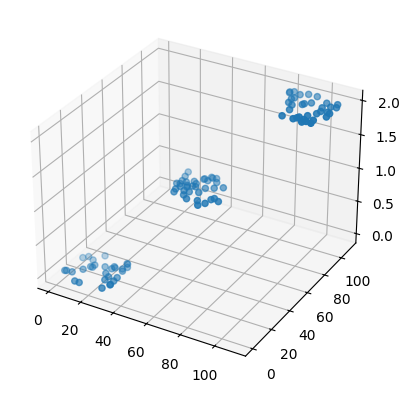

In [4]:
#数据生成与导入

#训练数据
filename="data.txt"
genrate()
data_train=dataload()
x_train=data_train[:,0:2]
y_train=data_train[:,2]
lable_train=np.zeros((100,3))
for i in range(100):
    if y_train[i]==0:
        lable_train[i]=[1,0,0]
    if y_train[i]==1:
        lable_train[i]=[0,1,0]
    if y_train[i]==2:
        lable_train[i]=[0,0,1]

X ,Y ,Z = x_train[:,0],x_train[:,1],y_train

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# 绘制散点图
ax.scatter(X, Y, Z)
#测试数据
data_test=test()
x_test=data_test[:,0:2]
y_test=data_test[:,2]
lable_test=np.zeros((30,3))
for i in range(30):
    if y_test[i]==0:
        lable_test[i]=[1,0,0]
    if y_test[i]==1:
        lable_test[i]=[0,1,0]
    if y_test[i]==2:
        lable_test[i]=[0,0,1]

第0次训练集误差:0.956811495005766
第0次测试集误差:0.9565411835491943
第50次训练集误差:0.33893058053478203
第50次测试集误差:0.34033920115937016
第100次训练集误差:0.30178831329628186
第100次测试集误差:0.3040410699189176
第150次训练集误差:0.18533865373935646
第150次测试集误差:0.17488793849175918
第200次训练集误差:0.15336283378361065
第200次测试集误差:0.14868233548526108
第250次训练集误差:0.05142329737062558
第250次测试集误差:0.0581295163284669
第300次训练集误差:0.011486923870193514
第300次测试集误差:0.014836599743118326
第350次训练集误差:0.006920983683487118
第350次测试集误差:0.009812556984571305
第400次训练集误差:0.004924717251749193
第400次测试集误差:0.007557363580544525
第450次训练集误差:0.0038162045591439535
第450次测试集误差:0.006282789347558396
第500次训练集误差:0.003112548618584655
第500次测试集误差:0.005461253948728896
第550次训练集误差:0.002626376416937232
第550次测试集误差:0.004885159662601503
第600次训练集误差:0.002270309937553659
第600次测试集误差:0.004456896577081547
第650次训练集误差:0.0019982251410775587
第650次测试集误差:0.004124650783588797
第700次训练集误差:0.001783500829710148
第700次测试集误差:0.003858386778118629
第750次训练集误差:0.001609700990691082
第750次测试集误差:0.0036394903303749

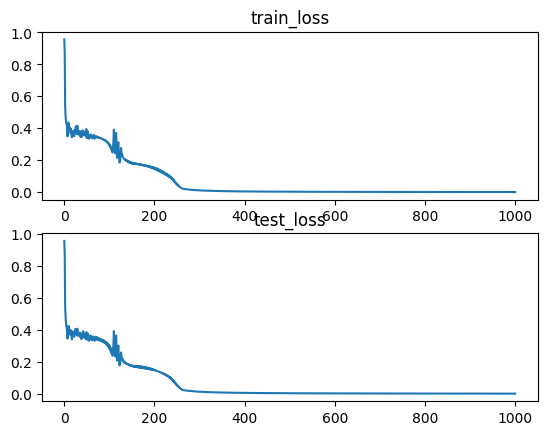

In [12]:
myMLP=MLP()
time=1000
alpha = 0.1
accept=0
correct=0.0
predict=np.argmax(myMLP.forward(time,x_train,lable_train,x_test,lable_test,accept,alpha),1)
correct+=(predict==y_test).sum()
print("测试集正确率为：{} %".format(100*correct/30))
myMLP.draw()

第0次训练集误差:0.9396734048271308
第0次测试集误差:0.9389666911950482
第50次训练集误差:0.4999860399992535
第50次测试集误差:0.49998657395815976
第100次训练集误差:0.49998380790926034
第100次测试集误差:0.4999844271527434
第150次训练集误差:0.4999807329360145
第150次测试集误差:0.4999814694948902
第200次训练集误差:0.4999762295415331
第200次测试集误差:0.49997713750895784
第250次训练集误差:0.499969009504246
第250次测试集误差:0.49997019119498903
第300次训练集误差:0.49995558311176586
第300次测试集误差:0.4999572700477805
第350次训练集误差:0.4999221153191691
第350次测试集误差:0.4999250399811462
第400次训练集误差:0.4997012844771117
第400次测试集误差:0.49971172446872436
第450次训练集误差:0.32822095031976656
第450次测试集误差:0.3311413309514565
第500次训练集误差:0.15049609086879762
第500次测试集误差:0.15196412996904518
第550次训练集误差:0.3990433251231601
第550次测试集误差:0.3603936204039485
第600次训练集误差:0.032121905158989945
第600次测试集误差:0.038129696393517425
第650次训练集误差:0.0024303993097985217
第650次测试集误差:0.0049966944516725755
第700次训练集误差:0.0010502085157366244
第700次测试集误差:0.002932541589305157
第750次训练集误差:0.0006751437511744422
第750次测试集误差:0.0022838926985438096
第800次训练集误差:0.0004

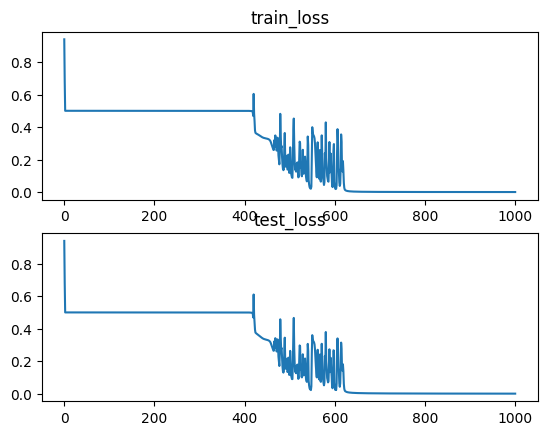

In [15]:
#训练过程与绘图
myMLP=MLP()
time=1000
alpha = 0.5
accept=0
correct=0.0
predict=np.argmax(myMLP.forward(time,x_train,lable_train,x_test,lable_test,accept,alpha),1)
correct+=(predict==y_test).sum()
print("测试集正确率为：{} %".format(100*correct/30))
myMLP.draw()

第0次训练集误差:0.9689099284296099
第0次测试集误差:0.9681041016901425
第50次训练集误差:0.49999997341402713
第50次测试集误差:0.4999999754517005
第100次训练集误差:0.4999999733895526
第100次测试集误差:0.49999997542917657
第150次训练集误差:0.4999999733650315
第150次测试集误差:0.49999997540660995
第200次训练集误差:0.49999997334046364
第200次测试集误差:0.4999999753840004
第250次训练集误差:0.4999999733158491
第250次测试集误差:0.49999997536134766
第300次训练集误差:0.4999999732911876
第300次测试集误差:0.4999999753386519
第350次训练集误差:0.49999997326647894
第350次测试集误差:0.4999999753159128
第400次训练集误差:0.4999999732417232
第400次测试集误差:0.4999999752931301
第450次训练集误差:0.49999997321692
第450次测试集误差:0.49999997527030415
第500次训练集误差:0.49999997319206935
第500次测试集误差:0.4999999752474344
第550次训练集误差:0.4999999731671711
第550次测试集误差:0.4999999752245208
第600次训练集误差:0.49999997314222505
第600次测试集误差:0.4999999752015633
第650次训练集误差:0.4999999731172311
第650次测试集误差:0.49999997517856176
第700次训练集误差:0.4999999730921892
第700次测试集误差:0.49999997515551614
第750次训练集误差:0.499999973067099
第750次测试集误差:0.49999997513242606
第800次训练集误差:0.49999997304196053
第800次测

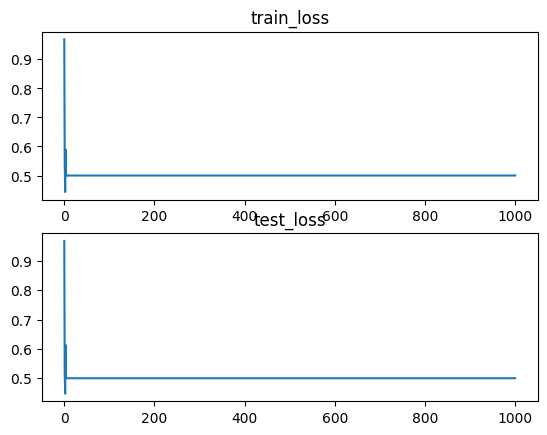

In [16]:
#训练过程与绘图
myMLP=MLP()
time=1000
alpha = 0.8
accept=0
correct=0.0
predict=np.argmax(myMLP.forward(time,x_train,lable_train,x_test,lable_test,accept,alpha),1)
correct+=(predict==y_test).sum()
print("测试集正确率为：{} %".format(100*correct/30))
myMLP.draw()

In [17]:
#输出最终修正的权重
print(myMLP.first)
print(myMLP.second)
print(myMLP.final)


[[0.68395252 0.48627991 0.91355567 0.41801266 0.63830657 0.30563124
  0.16130512 0.89310283 0.90408261 0.38853079]
 [0.76043051 0.15078527 0.68900207 0.22669003 0.20495743 0.36536421
  0.10713999 0.74781322 0.3340599  0.35599443]]
[[ 0.27820168 -0.02510844  0.03417424  0.89921773  0.2408316  -0.16642959
   0.06739959  0.57449228]
 [ 0.1231861   0.02951785  0.14435285  0.58615306  0.63687277 -0.07902601
   0.10348815  0.63875179]
 [-0.04923312 -0.19437356 -0.33777209  0.93270703  0.55428888  0.03549353
  -0.06315977  0.3910836 ]
 [ 0.35972562 -0.15659618  0.32845633  0.84360583  0.02587662  0.19010986
  -0.13262641  0.01395615]
 [ 0.34211677 -0.00109925 -0.08884753  0.77405229  0.11097332  0.73656962
   0.62408199  0.77361099]
 [-0.07953826  0.5628454  -0.01278381  0.6179788   0.71202324  0.58843184
  -0.13769152  0.07640287]
 [ 0.5451709   0.43626056  0.70289448  0.47705454 -0.03301897  0.46019074
   0.28999456 -0.12687408]
 [ 0.73757676  0.34156008  0.5141893   0.23260624  0.79678968 